In [1]:
import pandas as pd
df = pd.read_csv('Elevator.csv')

## Data Cleaning

In [2]:
# rename columns
df.rename(columns = {'What day is it today?': 'Day',
                     'Which elevator did you take?': 'Elevator',
                     'Which floor(s) did you stop at?': 'Stops'},
                     inplace = True)

In [3]:
df.iloc[:5]

,Timestamp,Day,Elevator,Stops
0,9/9/2024 9:00:34,Tuesday,E2,Neuf
1,9/9/2024 9:00:48,Wednesday,E1,"Huit, Cinq"
2,9/9/2024 9:01:01,Thursday,E1,"Douze, Onze"
3,9/9/2024 9:01:13,Friday,E1,Quatre
4,9/9/2024 9:44:35,Monday,E1,"Dix, Cinq"


In [4]:
# break up floor stops into a variable for each floor
df['F2'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Deux' in x else 0)
df['F3'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Trois' in x else 0)
df['F4'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Quatre' in x else 0)
df['F5'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Cinq' in x else 0)
df['F6'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Six' in x else 0)
df['F7'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Sept' in x else 0)
df['F8'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Huit' in x else 0)
df['F9'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Neuf' in x else 0)
df['F10'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Dix' in x else 0)
df['F11'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Onze' in x else 0)
df['F12'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Douze' in x else 0)
df['F13'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Treize' in x else 0)
df['F14'] = df['Stops'].apply(lambda x: 1 if pd.notnull(x) and 'Quatorze' in x else 0)
df['nstops'] = df.loc[:, 'F2':'F14'].sum(axis=1)
df.drop(columns = 'Stops', inplace = True)

df.iloc[:5]

,Timestamp,Day,Elevator,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,nstops
0,9/9/2024 9:00:34,Tuesday,E2,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,9/9/2024 9:00:48,Wednesday,E1,0,0,0,1,0,0,1,0,0,0,0,0,0,2
2,9/9/2024 9:01:01,Thursday,E1,0,0,0,0,0,0,0,0,0,1,1,0,0,2
3,9/9/2024 9:01:13,Friday,E1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,9/9/2024 9:44:35,Monday,E1,0,0,0,1,0,0,0,0,1,0,0,0,0,2


In [5]:
# extract the minute from the timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Minute'] = df['Timestamp'].dt.minute
df.iloc[:5]

,Timestamp,Day,Elevator,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,nstops,Minute
0,2024-09-09 09:00:34,Tuesday,E2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2024-09-09 09:00:48,Wednesday,E1,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0
2,2024-09-09 09:01:01,Thursday,E1,0,0,0,0,0,0,0,0,0,1,1,0,0,2,1
3,2024-09-09 09:01:13,Friday,E1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,2024-09-09 09:44:35,Monday,E1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,44


In [6]:
# manually change minutes from first week (guesses)
df.loc[0, 'Minute'] = 38
df.loc[1, 'Minute'] = 43
df.loc[2, 'Minute'] = 40
df.loc[3, 'Minute'] = 45
df.iloc[:5]

,Timestamp,Day,Elevator,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,nstops,Minute
0,2024-09-09 09:00:34,Tuesday,E2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,38
1,2024-09-09 09:00:48,Wednesday,E1,0,0,0,1,0,0,1,0,0,0,0,0,0,2,43
2,2024-09-09 09:01:01,Thursday,E1,0,0,0,0,0,0,0,0,0,1,1,0,0,2,40
3,2024-09-09 09:01:13,Friday,E1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,45
4,2024-09-09 09:44:35,Monday,E1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,44


## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Departure Time')

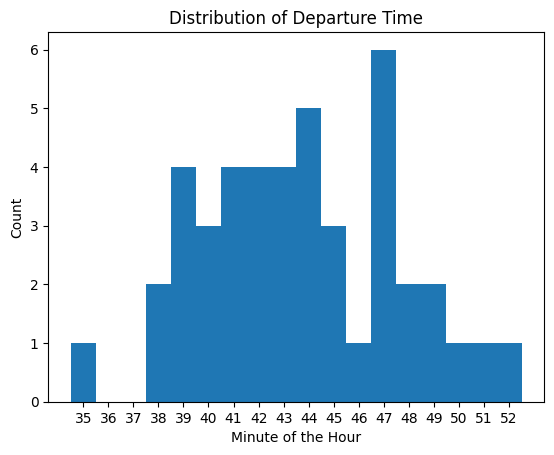

In [7]:
import matplotlib.pyplot as plt
df['Minute'].hist(bins = range(35, 54), align='left')
plt.grid(False)
plt.xticks(range(35, 53, 1))
plt.xlabel('Minute of the Hour')
plt.ylabel('Count')
plt.title('Distribution of Departure Time')

Text(0.5, 1.0, 'Most Common Days of the Week')

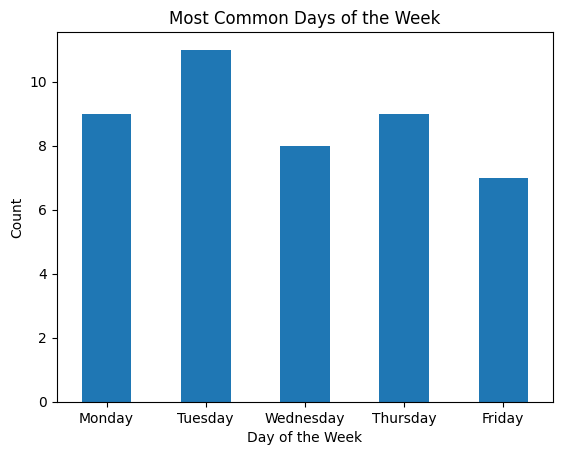

In [8]:
df['Day'] = pd.Categorical(df['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True)
df['Day'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Most Common Days of the Week')

Text(0.5, 1.0, 'Most Common Elevators Used')

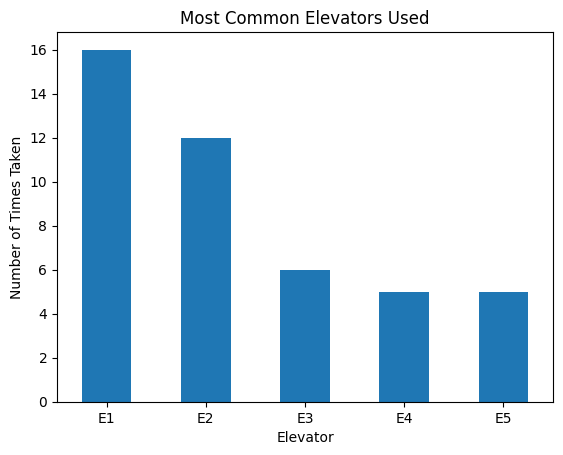

In [9]:
df['Elevator'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation = 0)
plt.xlabel('Elevator')
plt.ylabel('Number of Times Taken')
plt.title('Most Common Elevators Used')

Text(0.5, 1.0, 'Distribution of Number of Stops')

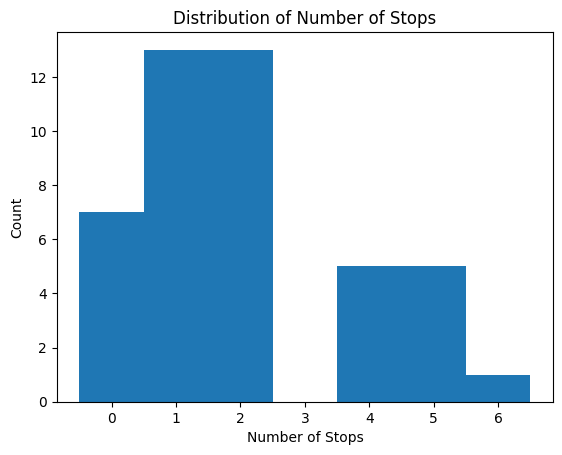

In [10]:
df['nstops'].hist(bins = range(0,8), align='left')
plt.grid(False)
plt.xticks(range(0, 7, 1))
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.title('Distribution of Number of Stops')

Text(0.5, 1.0, 'Most Problematic Floors')

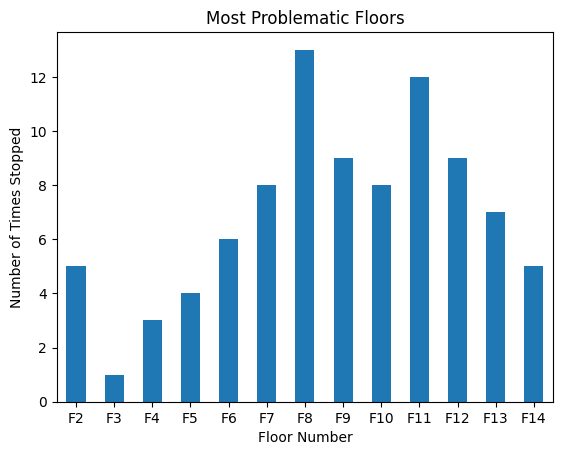

In [11]:
df.loc[:, 'F2':'F14'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Floor Number')
plt.ylabel('Number of Times Stopped')
plt.title('Most Problematic Floors')

C:\Users\ethan\AppData\Local\Temp\ipykernel_23432\4140536076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Day')['nstops'].mean().plot(kind='bar')


Text(0.5, 1.0, 'Most Problematic Days')

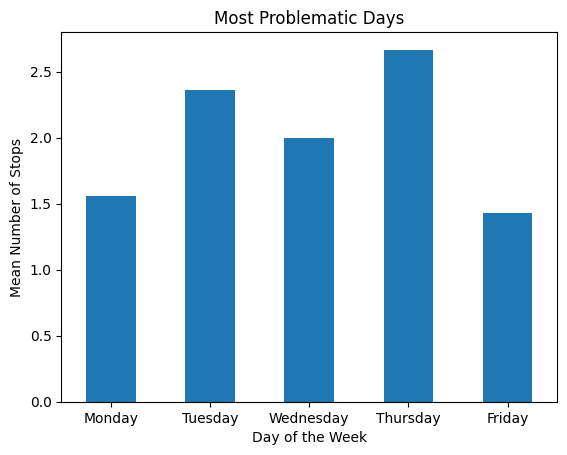

In [12]:
df.groupby('Day')['nstops'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Number of Stops')
plt.title('Most Problematic Days')

Text(0.5, 1.0, 'Most Problematic Elevators')

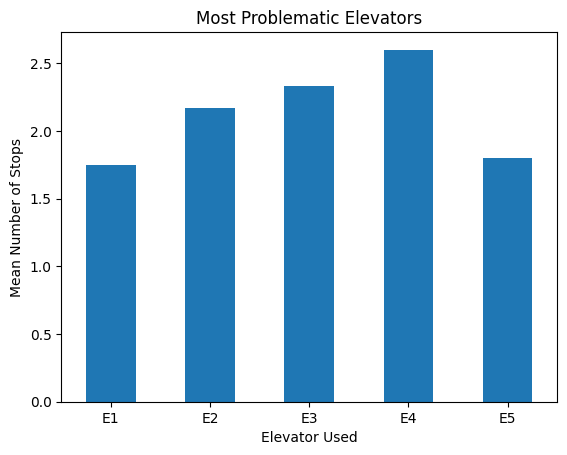

In [13]:
df.groupby('Elevator')['nstops'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Elevator Used')
plt.ylabel('Mean Number of Stops')
plt.title('Most Problematic Elevators')

C:\Users\ethan\AppData\Local\Temp\ipykernel_23432\3552040204.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('catMin')['nstops'].mean().plot(kind='bar')


Text(0.5, 1.0, 'Most Problematic Times')

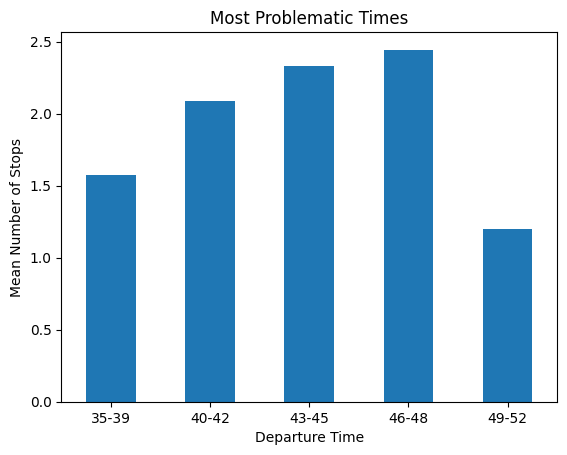

In [14]:
cutoffs = [0, 39.5, 42.5, 45.5, 48.5, 60]
df['catMin'] = pd.cut( df['Minute'], bins=cutoffs, labels=['35-39', '40-42', '43-45', '46-48', '49-52'], right=False)
df.groupby('catMin')['nstops'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Departure Time')
plt.ylabel('Mean Number of Stops')
plt.title('Most Problematic Times')

## Linear Regression

In [15]:
# get dummies from categorical variables
df_dummies = pd.get_dummies(df, columns=['Elevator', 'Day'], drop_first=True)
df_dummies.iloc[:5]

,Timestamp,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,Minute,catMin,Elevator_E2,Elevator_E3,Elevator_E4,Elevator_E5,Day_Tuesday,Day_Wednesday,Day_Thursday,Day_Friday
0,2024-09-09 09:00:34,0,0,0,0,0,0,0,1,0,...,38,35-39,True,False,False,False,True,False,False,False
1,2024-09-09 09:00:48,0,0,0,1,0,0,1,0,0,...,43,43-45,False,False,False,False,False,True,False,False
2,2024-09-09 09:01:01,0,0,0,0,0,0,0,0,0,...,40,40-42,False,False,False,False,False,False,True,False
3,2024-09-09 09:01:13,0,0,1,0,0,0,0,0,0,...,45,43-45,False,False,False,False,False,False,False,True
4,2024-09-09 09:44:35,0,0,0,1,0,0,0,0,1,...,44,43-45,False,False,False,False,False,False,False,False


In [16]:
# define X and y
X = df_dummies.loc[:, 'Minute':'Day_Friday'].drop(columns = 'catMin')
y = df_dummies['nstops']

In [17]:
# fit the linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [18]:
X.columns.dtype

dtype('O')

In [19]:
# output the intercepts
pd.DataFrame({
    'Feature': pd.concat([pd.Series("(Intercept)"), pd.Series(X.columns)]),
    'Coefficient': pd.concat([pd.Series(lr.intercept_), pd.Series(lr.coef_)])
})

,Feature,Coefficient
0,(Intercept),-3.883708
0,Minute,0.109606
1,Elevator_E2,0.221428
2,Elevator_E3,0.618462
3,Elevator_E4,0.416836
4,Elevator_E5,0.362275
5,Day_Tuesday,1.424562
6,Day_Wednesday,0.694265
7,Day_Thursday,1.777261
8,Day_Friday,0.406735


In [20]:
# predict values
y_pred = lr.predict(X)

In [21]:
# evaluate the model
from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print('Root Mean Squared Error :', round(rmse, 2))
print('R Squared :', round(r_squared, 3))

Root Mean Squared Error : 1.55
R Squared : 0.131
